In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../input/black-friday/train.csv')

In [3]:
# Check the shape of the dataset
dataset.shape

(550068, 12)

##### There are 550,068 rows and 12 columns

In [4]:
# Check the dataset if there is a missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### We can see that some columns/features have missing values.

In [5]:
# Check the total missing values on a specific column
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### Product Category 2 has 32% missing data while Product Category 3 has 70% missing data. Hence, we need to fill the null values to the average value of certain column

In [6]:
# Fill the missing values in Product Category 2 and 3
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['Product_Category_2'] = imputer.fit_transform(dataset['Product_Category_2'].to_numpy().reshape(-1,1))
dataset['Product_Category_3'] = imputer.fit_transform(dataset['Product_Category_3'].to_numpy().reshape(-1,1))

In [7]:
# Let's check again our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Now we have to convert the Product_Category 2 & 3 from float to int data type.

In [8]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].astype('int64')
dataset['Product_Category_3'] = dataset['Product_Category_3'].astype('int64')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


#### Now we have to convert categorical values to numerical values. We will be using LabelEncoder for the Gender, Age (Age_Group), City category, and Stay in current city years.

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender']).astype('int64')
dataset['Age'] = le.fit_transform(dataset['Age']).astype('int64')
dataset['City_Category'] = le.fit_transform(dataset['City_Category']).astype('int64')
dataset['Stay_In_Current_City_Years'] = le.fit_transform(dataset['Stay_In_Current_City_Years']).astype('int64')

#### Now we have to drop the User_ID and Product_ID to avoid bias in the data.

In [11]:
# Drop User_ID and Product_ID columns
dataset = dataset.drop(columns=['User_ID', 'Product_ID'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int64
 5   Marital_Status              550068 non-null  int64
 6   Product_Category_1          550068 non-null  int64
 7   Product_Category_2          550068 non-null  int64
 8   Product_Category_3          550068 non-null  int64
 9   Purchase                    550068 non-null  int64
dtypes: int64(10)
memory usage: 42.0 MB


#### Now, we are ready to train and test split our final dataset

In [12]:
# Creating X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size = 0.25, random_state = 0)

#### Before we create our model, we need to standardization our dataset to have more accuracy

In [13]:
# Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])

In [14]:
# Import our evaluation metrics
from sklearn.metrics import mean_squared_error

#### Build our regression models

In [15]:
# Fitting Polynomial Regression to the dataset &
# applying Polynomial Regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
poly = LinearRegression()
poly.fit(X_poly, y_train)
y_pred = poly.predict(poly_reg.fit_transform(X_test))

# Polynomial Regression
print("Polynomial Regression")
# Root Mean Squared Error
print("Root Mean Squared Error: {:.2f}%".format(mean_squared_error(y_test, y_pred, squared=False)))
pr_rmse = mean_squared_error(y_test, y_pred, squared=False)

Polynomial Regression
Root Mean Squared Error: 3968.28%


In [16]:
# Build Bayesian Ridge Regression Model
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

# Bayesian Ridge Regression
print("Bayesian Ridge Regression")
# Root Mean Squared Error
print("Root Mean Squared Error: {:.2f}%".format(mean_squared_error(y_test, y_pred, squared=False)))
br_rmse = mean_squared_error(y_test, y_pred, squared=False)

Bayesian Ridge Regression
Root Mean Squared Error: 4679.03%


In [17]:
# Build ElasticNet Regression model
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)

# ElasticNet Regression
print("ElasticNet Regression")
# Root Mean Squared Error
print("Root Mean Squared Error: {:.2f}%".format(mean_squared_error(y_test, y_pred, squared=False)))
en_rmse = mean_squared_error(y_test, y_pred, squared=False)

ElasticNet Regression
Root Mean Squared Error: 4752.06%


In [18]:
# Build our ANN model
import tensorflow as tf
ann = tf.keras.models.Sequential()

# Adding 2 hidden layers
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

# Compiling our ann
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

# Train our ANN model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

y_pred = ann.predict(X_test)

print()
# ANN Regression
print("ANN Regression")
# Root Mean Squared Error
print("Root Mean Squared Error: {:.2f}%".format(mean_squared_error(y_test, y_pred, squared=False)))
ann_rmse = mean_squared_error(y_test, y_pred, squared=False)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Epoch 1/100
12893/12893 [==============================] - 22s 2ms/step - loss: 110962592.0000 - mse: 110962592.0000
Epoch 2/100
12893/12893 [==============================] - 22s 2ms/step - loss: 110962552.0000 - mse: 110962552.0000
Epoch 3/100
12893/12893 [==============================] - 21s 2ms/step - loss: 110962624.0000 - mse: 110962624.0000
Epoch 4/100
12893/12893 [==============================] - 21s 2ms/step - loss: 110962600.0000 - mse: 110962600.0000
Epoch 5/100
12893/12893 [==============================] - 21s 2ms/step - loss: 110962544.0000 - mse: 110962544.0000
Epoch 6/100
12893/12893 [==============================] - 21s 2ms/step - loss: 110962312.0000 - mse: 110962312.0000
Epoch 7/100
12893/12893 [==============================] - 21s 2ms/step - loss: 110962296.0000 - mse: 110962296.0000
Epoch 8/100
12893/12893 [==============================] - 22s 2ms/step - loss: 110962096.0000 - mse: 110962096.0000
Epoch 9/100
12893/12893 [==============================] - 22s 2

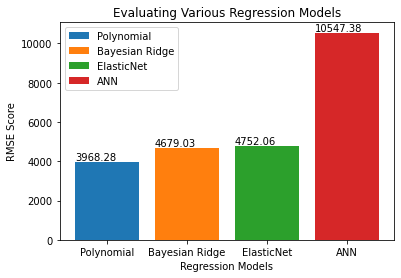

In [19]:
# Barplot their RMSE Scores
import matplotlib.colors as mcolors
rmse_scores = [pr_rmse, br_rmse, en_rmse, ann_rmse]
models = ['Polynomial', 'Bayesian Ridge', 'ElasticNet', 'ANN']

p = plt.bar(height = rmse_scores, x = models, 
            color = mcolors.TABLEAU_COLORS)
plt.title('Evaluating Various Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('RMSE Score')
plt.legend(p, models, loc = 'best', fontsize = 'medium')
for bar in p:
    yval = bar.get_height()
    plt.text(bar.get_x(), np.around(yval, 2) + 100, np.around(yval, 2))
plt.show()

**We can see that the best model is by utilizing the Polynomial Regression Model. However, we can improve this by applying the hyperparameter tuning and utilizing different Regression models.**